# My portfolio

## Import database

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import xlwings as xw

country = 'US'
FORMATION_DATE = '2024-10-21'

if country == 'IN':
    df_database = pd.read_excel('results/df_vgm_score_2024-10-22_IN.xlsx')
else:
    df_database = pd.read_excel('results/df_vgm_score_2024-10-22_US.xlsx')

df_database.tail(2)

,Symbol,Name of Company,VGM Ratings,Value,Growth,Momentum,Low Risk,Sector,Industry,Open,...,FCF Growth,Asset Growth,ROE,ROCE,Short Term Momentum,Medium Term Momentum,Long Term Momentum,Short Term Industry Momentum,Medium Term Industry Momentum,Long Term Industry Momentum
2301,ARCH,Arch Resources Inc,1,1,1,2,5,Energy,Coal,141.95,...,0.0,0.0,2.5,2.5,1.5,1.0,1.0,3.0,2.5,1.5
2302,PAX,Patria Investments Ltd,1,1,1,1,8,Financial Services,Asset Management,11.50,...,0.0,3.5,2.5,2.5,1.0,0.5,0.5,0.5,0.5,0.5


## Create portfolio

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import xlwings as xw

if country == 'IN':
    df_portfolio = pd.read_excel('datasets/AILabsFinance_Offerings.xlsx', sheet_name='Symbols_IN')
else:
    df_portfolio = pd.read_excel('datasets/AILabsFinance_Offerings.xlsx', sheet_name='Symbols_US')

benchmark = df_portfolio['Benchmark'].iloc[0]
print(f'Benchmark selected: {benchmark}')
df_portfolio = df_portfolio[['Symbol','Fullname']]
df_portfolio

Benchmark selected: ^GSPC


,Symbol,Fullname
0,WLFC,Willis Lease Finance Corp
1,CMPO,CompoSecure Inc
2,CALM,Cal-Maine Foods Inc
3,COMM,CommScope Holding Co Inc
4,VIRT,Virtu Financial Inc
5,UAL,United Airlines Holdings Inc
6,VHI,Valhi Inc
7,LMT,Lockheed Martin Corp
8,PRG,PROG Holdings Inc
9,BIPC,Brookfield Infrastructure Corp


In [3]:
df_portfolio = pd.merge(df_portfolio, df_database, on = 'Symbol', how = 'left')
df_portfolio.columns

Index(['Symbol', 'Fullname', 'Name of Company', 'VGM Ratings', 'Value',
       'Growth', 'Momentum', 'Low Risk', 'Sector', 'Industry', 'Open', 'High',
       'Low', 'Close', 'Prev Close', 'Change', 'Change%', 'Volume',
       'Avg Vol 20D', '52 Week High', '52 Week Low', '1W Return', '1M Return',
       '3M Return', '6M Return', 'YTD Performance', '1Y Return', 'Marketcap',
       'Last Available Date', 'PB Ratio', 'PS Ratio', 'PE Ratio',
       'Dividend Yield', 'Price-to-Free-Cash-Flow Ratio', 'FCF Yield',
       'EV-to-EBITDA', 'Revenue Growth', 'EPS Growth',
       'Operating Income Growth', 'FCF Growth', 'Asset Growth', 'ROE', 'ROCE',
       'Short Term Momentum', 'Medium Term Momentum', 'Long Term Momentum',
       'Short Term Industry Momentum', 'Medium Term Industry Momentum',
       'Long Term Industry Momentum'],
      dtype='object')

In [4]:
df_portfolio_final = df_portfolio[['Symbol','Name of Company','Close', 'Prev Close', 'Change%', 'Volume', 'Avg Vol 20D','52 Week High', '52 Week Low','YTD Performance']].copy()
wb = xw.Book('datasets/AILabsFinance_Offerings.xlsx')
sht = wb.sheets['Portfolio 1']

sht.range('E47').options(index=False, header=True).value = df_portfolio_final
print(f"Data written to {sht.name} in {wb.fullname}")

Data written to Portfolio 1 in C:\Users\DCG\Documents\MEGA\Codes\03_Github_Repository\FinRecipes\examples\WealthEngine_AI\datasets\AILabsFinance_Offerings.xlsx


In [20]:
df_portfolio_final = df_portfolio[['Symbol','Name of Company','VGM Ratings','Value','Growth','Momentum','Low Risk','Sector', 'Industry']].copy()
wb = xw.Book('datasets/AILabsFinance_Offerings.xlsx')
sht = wb.sheets['Portfolio 1']

sht.range('E23').options(index=False, header=True).value = df_portfolio_final
sht.range('L14').options(index=False, header=True).value = round(df_portfolio_final['VGM Ratings'].mean(),0)
sht.range('N13').options(index=False, header=True).value = round(df_portfolio_final['Value'].mean(),0)
sht.range('N15').options(index=False, header=True).value = round(df_portfolio_final['Growth'].mean(),0)
sht.range('N17').options(index=False, header=True).value = round(df_portfolio_final['Momentum'].mean(),0)
sht.range('N19').options(index=False, header=True).value = round(df_portfolio_final['Low Risk'].mean(),0)

print(f"Data written to {sht.name} in {wb.fullname}")

Data written to Portfolio 1 in C:\Users\DCG\Documents\MEGA\Codes\03_Github_Repository\FinRecipes\examples\WealthEngine_AI\datasets\AILabsFinance_Offerings.xlsx


## Sector Plot

In [6]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import xlwings as xw

# # Count the occurrences of each sector
# df_sector = df_portfolio[['Symbol', 'Sector']]
# sector_counts = df_sector['Sector'].value_counts()

# # Create a donut chart
# fig, ax = plt.subplots(figsize=(10, 6))
# wedges, texts, autotexts = ax.pie(sector_counts, 
#                                   labels=sector_counts.index, 
#                                   autopct='%1.1f%%', 
#                                   startangle=140, 
#                                   colors=plt.cm.Paired.colors)

# # Draw a white circle in the center to create a donut chart
# centre_circle = plt.Circle((0, 0), 0.70, fc='white')
# ax.add_artist(centre_circle)

# # Add title
# # ax.set_title('Distribution of Symbols per Sector', fontsize=14)

# # Create a legend on the right side
# ax.legend(wedges, [f'{label}: {count}' for label, count in zip(sector_counts.index, sector_counts)], 
#           title="Sectors", loc="upper right", bbox_to_anchor=(1.3, 1))

# # Equal aspect ratio ensures that the pie chart is circular
# ax.axis('equal')
# plt.tight_layout()

# # Show the chart
# plt.show()

# # Save the figure to Excel using xlwings
# wb = xw.Book('datasets/AILabsFinance_Offerings.xlsx')
# sht = wb.sheets['Portfolio 1']  # Explicitly reference the sheet

# # Remove any existing picture with the same name
# for pic in sht.pictures:
#     if pic.name == 'Asset Allocation':
#         pic.api.Delete()

# # Add new picture
# sht.pictures.add(fig, name='Asset Allocation', update=True, 
#                  left=sht.range('F72').left, top=sht.range('H72').top, width=500)

# plt.close()  # Close the plot after saving



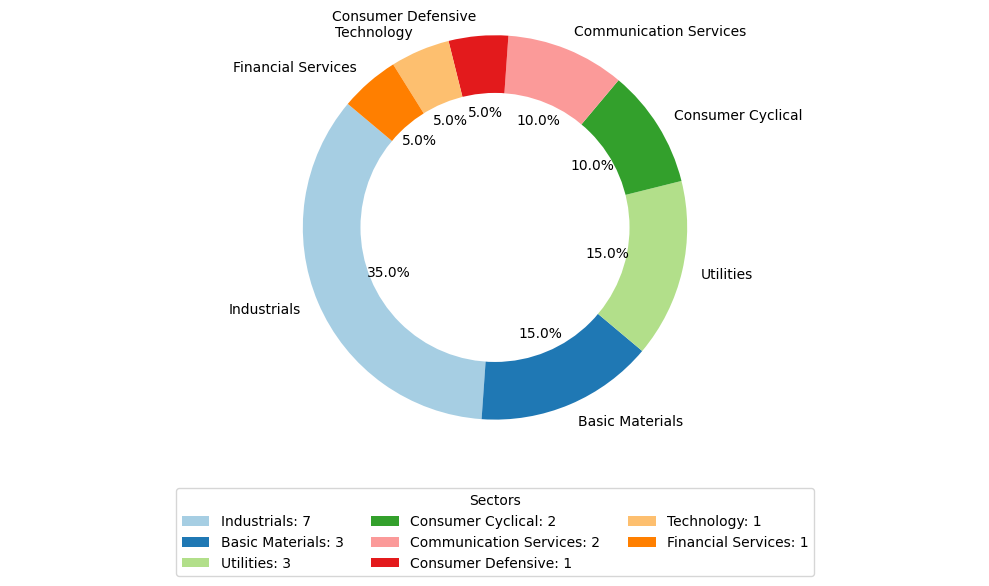

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import xlwings as xw

# Count the occurrences of each sector
df_sector = df_portfolio[['Symbol', 'Sector']]
sector_counts = df_sector['Sector'].value_counts()

# Create a larger donut chart
fig, ax = plt.subplots(figsize=(10, 6))  # Increased figure size for better visibility
wedges, texts, autotexts = ax.pie(sector_counts, 
                                   labels=sector_counts.index, 
                                   autopct='%1.1f%%', 
                                   startangle=140, 
                                   colors=plt.cm.Paired.colors)

# Draw a white circle in the center to create a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
ax.add_artist(centre_circle)

# Create a legend at the bottom of the chart
ax.legend(wedges, 
          [f'{label}: {count}' for label, count in zip(sector_counts.index, sector_counts)], 
          title="Sectors", loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=3)  # Positioned at the bottom

# Equal aspect ratio ensures that the pie chart is circular
ax.axis('equal')
plt.tight_layout()

# Show the chart
plt.show()

# Save the figure to Excel using xlwings
wb = xw.Book('datasets/AILabsFinance_Offerings.xlsx')
sht = wb.sheets['Portfolio 1']  # Explicitly reference the sheet

# # Remove any existing picture with the same name
# for pic in sht.pictures:
#     if pic.name == 'Asset Allocation':
#         pic.api.Delete()

# Add new picture
sht.pictures.add(fig, name='Asset Allocation', update=True, 
                 left=sht.range('E72').left, top=sht.range('H72').top, width=500)

plt.close()  # Close the plot after saving



# Industry Distribution

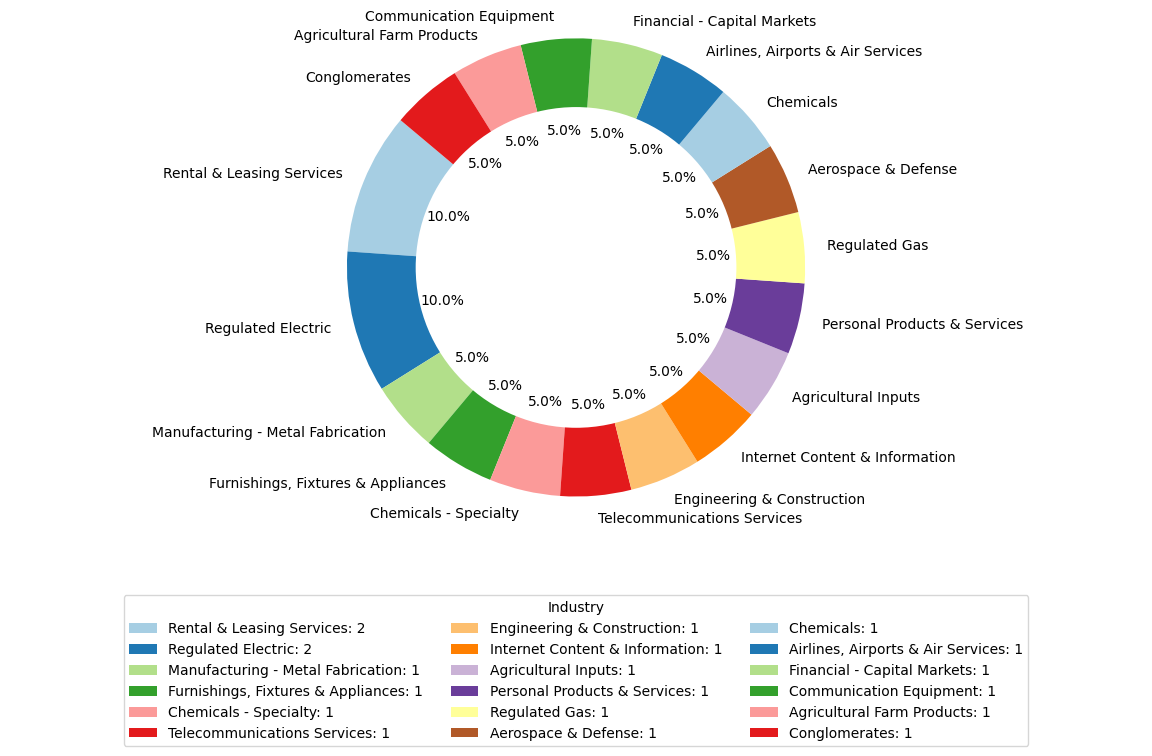

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import xlwings as xw

# Count the occurrences of each sector
df_industry = df_portfolio[['Symbol', 'Industry']]
sector_counts = df_industry['Industry'].value_counts()

# Create a donut chart
fig, ax = plt.subplots(figsize=(12, 8))
wedges, texts, autotexts = ax.pie(sector_counts, 
                                  labels=sector_counts.index, 
                                  autopct='%1.1f%%', 
                                  startangle=140, 
                                  colors=plt.cm.Paired.colors)

# Draw a white circle in the center to create a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
ax.add_artist(centre_circle)

# Create a legend below the pie chart, shifted down
ax.legend(wedges, [f'{label}: {count}' for label, count in zip(sector_counts.index, sector_counts)], 
           title="Industry", loc="center", bbox_to_anchor=(0.5, -0.3), ncol=3)  # Adjusted y-position

# Equal aspect ratio ensures that the pie chart is circular
ax.axis('equal')
plt.tight_layout()

# Show the chart
plt.show()

# Save the figure to Excel using xlwings
wb = xw.Book('datasets/AILabsFinance_Offerings.xlsx')
sht = wb.sheets['Portfolio 1']  # Explicitly reference the sheet

# Add new picture
sht.pictures.add(fig, name='Asset Allocation3', update=True, 
                 left=sht.range('K72').left, top=sht.range('N72').top, width=500)

plt.close()  # Close the plot after saving



## Last one year performance

In [9]:
import os
import platform
import sys
import pandas as pd
import datetime as dt
from datetime import datetime, timedelta
import time
import pandas as pd
import numpy as np

sys.path.append('../../FinRecipes/')                                       # comment this line for server

from preprocess import Load_n_Preprocess
from models import buy_hold_portfolio_return
import matplotlib.dates as mdates
import empyrical as ep
# from plots import plot_returns_drawdown

import matplotlib
%matplotlib inline

In [10]:
TICKERS_LIST = df_portfolio['Symbol'].tolist()

In [11]:
start_time = time.time()
start_download = time.time()
PERIOD = 366*1
END_DATE = dt.datetime.strptime(FORMATION_DATE, '%Y-%m-%d')
START_DATE = END_DATE - dt.timedelta(days= PERIOD)

# LP = Load_n_Preprocess(TICKERS_LIST, START_DATE, END_DATE)
# df_tics_daily = LP.download_yfinance(is_live = True)
# df_tics_daily = LP.clean_daily_data(df_tics_daily, missing_values_allowed = 0.01)
# TICKERS_LIST = df_tics_daily['tic'].unique().tolist()

if country == 'IN':
    PATH_DAILY_DATA = "../Quant_Rating/datasets/df_ohlcv_daily_IN.h5"
elif country == 'US':
    PATH_DAILY_DATA = "../Quant_Rating/datasets/df_ohlcv_daily_US.h5"


LP = Load_n_Preprocess(TICKERS_LIST, START_DATE, END_DATE, path_daily_data = PATH_DAILY_DATA)
df_tics_daily = LP.load_daily_data()
df_tics_daily = LP.clean_daily_data(df_tics_daily, missing_values_allowed = 0.01)
TICKERS_LIST_INDEX = LP.tickers_list

print(len(TICKERS_LIST))
# df_tics_daily.to_hdf(PATH_DAILY_DATA,"df",mode = 'w')
df_return_bnh = buy_hold_portfolio_return(df_tics_daily)

# ============================= Prepare data for to plot Buy-Hold returns  ======================
df_return_bnh = df_return_bnh.reset_index()
df_return_bnh.columns = ['date','Buy_Hold_Returns']
df_return_bnh['date'] = pd.to_datetime(df_return_bnh['date'])
df_return_bnh = df_return_bnh.set_index(['date'])

# # ===============================     Plotting  ====================================
INDICES_LIST = [benchmark]
LP = Load_n_Preprocess(INDICES_LIST, START_DATE, END_DATE)
df_indices_daily = LP.download_yfinance(is_live = True)
df_indices_close = pd.pivot_table(df_indices_daily, values ='close', index = 'date',columns='tic')
df_indices_return = df_indices_close.pct_change().fillna(0)
# df_return_bnh['Portfolio_Trend'] = df_return_bnh['Buy_Hold_returns'].rolling(window=TREND_WINDOW).mean()
df_return_bnh = df_return_bnh.merge(df_indices_return,how='left',on = 'date')
# df_return_bnh = df_return_bnh.drop(columns=['Portfolio_Trend'])

if country == 'IN':
    df_return_bnh = df_return_bnh.rename(columns = {'Buy_Hold_Returns':'Portfolio 1', benchmark: 'NIFTY 50'})
    df_return_bnh = df_return_bnh[['Portfolio 1','NIFTY 50']]
elif country == 'US':
    df_return_bnh = df_return_bnh.rename(columns = {'Buy_Hold_Returns':'Portfolio 1', benchmark: 'S&P 500'})
    df_return_bnh = df_return_bnh[['Portfolio 1','S&P 500']]

[] are removed due to missing data.
Duplicate test: there is no duplicate rows.
20


[*********************100%%**********************]  1 of 1 completed

Shape of DataFrame:  (254, 8)
Number of Tickers: 1


In [12]:
df_return_bnh.iloc[0] = 0
df_return_bnh

,Portfolio 1,S&P 500
date,,
2023-10-24,0.000000,0.000000
2023-10-25,-0.007463,-0.014340
2023-10-26,-0.005749,-0.011833
2023-10-27,-0.012811,-0.004800
2023-10-30,-0.009394,0.012010
...,...,...
2024-10-15,0.007362,-0.007609
2024-10-16,0.017336,0.004679
2024-10-17,0.000983,-0.000171


In [13]:
import matplotlib.pyplot as plt
import xlwings as xw
import empyrical as ep  # Assuming you're using empyrical for return calculations
import numpy as np
import matplotlib.dates as mdates

df_returns = df_return_bnh.copy()
period = 'daily'
name_stock_world = None
filename = 'Our_Portfolio'
tickers_list = []
pos = 'lower right'

# Prepare the DataFrame for plotting
df_returns['date'] = mdates.date2num(df_returns.index)
df_returns = df_returns.rename(columns={"^GSPC": "S&P 500", "^NDX": "NASDAQ 100"})

# Create a figure with space for the table, cumulative returns, and drawdown plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10), sharex=True, gridspec_kw={'height_ratios': [2.5, 1]})
ax1.set_position([0.1, 0.55, 0.8, 0.35])  # Adjust the position of cumulative returns plot
ax2.set_position([0.1, 0.1, 0.8, 0.4])  # Adjust the position of drawdown plot

# Collect data for the table without the 'CAGR' column
data = []
column_list = df_returns.columns.to_list()
for col in column_list[:-1]:  # Exclude the 'date' column if it's included
    final_return = 100 * ep.cum_returns_final(df_returns[col])
    sharpe_ratio = ep.sharpe_ratio(df_returns[col], period=period)
    max_drawdown = -100 * ep.max_drawdown(df_returns[col])
    data.append([col, f"{final_return:.2f}", f"{sharpe_ratio:.2f}", f"{max_drawdown:.2f}"])

# Create the figure and subplots with adjusted space for the table at the top
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10), sharex=True, gridspec_kw={'height_ratios': [2.5, 1]})
plt.subplots_adjust(top=0.85, hspace=0.15)  # Adjusted top for table and subplots

# Create a new axis for the table above both plots
ax_table = fig.add_subplot(111, frame_on=False)
ax_table.xaxis.set_visible(False)
ax_table.yaxis.set_visible(False)

# Create the table without the 'CAGR (%)' label
table = plt.table(cellText=data,
                  colLabels=[' ', 'Return (%)', 'Sharpe Ratio', 'Max Drawdown (%)'],  # Removed 'CAGR (%)'
                  cellLoc='center', loc='top', bbox=[0, 1.05, 1, 0.2],  # Position the table at the top
                  colWidths=[0.2, 0.2, 0.2, 0.2])

# Adjust column alignment for numeric values
for (i, j), cell in table.get_celld().items():
    if i == 0:  # Header row
        cell.set_text_props(horizontalalignment='center')
    else:
        if j == 0:  # First column (labels)
            cell.set_text_props(horizontalalignment='left')
        else:
            cell.set_text_props(horizontalalignment='center')

table.auto_set_font_size(False)
table.set_fontsize(18)

# Plotting Cumulative Returns
linestyle_val = ['-', '-.', '--', ':', '-']
linewidth_val = [2, 1.5, 1.5, 1.5, 1.5]
color_val = ['royalblue', 'red', 'darkorange', 'green', 'purple']

for idx in np.arange(len(df_returns.columns.to_list()) - 1):
    ax1.plot(df_returns['date'].values, 100 * ((df_returns[df_returns.columns.to_list()[idx]] + 1).cumprod() - 1).values,
             color=color_val[idx], linestyle=linestyle_val[idx], linewidth=linewidth_val[idx], label=f'{df_returns.columns.to_list()[idx]} Returns')

ax1.set_ylabel("Cumulative Return (%)", fontsize=16)
ax1.tick_params(axis='y', labelsize=16)
ax1.grid(linestyle='dotted', linewidth=1)
ax1.legend(df_returns.columns.to_list(), fontsize=16)

# Plotting Drawdowns
for idx in np.arange(len(df_returns.columns.to_list()) - 1):
    cum_return = (df_returns[df_returns.columns.to_list()[idx]] + 1).cumprod()
    drawdown = -(1 - cum_return / cum_return.cummax()) * 100
    ax2.fill_between(df_returns['date'], drawdown, color=color_val[idx], alpha=0.3, label=f'{df_returns.columns.to_list()[idx]} Drawdown')

ax2.set_xlabel('Date', fontsize=16)
ax2.set_ylabel('Drawdown (%)', fontsize=16)
ax2.legend(loc=pos, fontsize=16)
ax2.xaxis_date()
ax2.tick_params(axis='x', labelsize=16)
ax2.tick_params(axis='y', labelsize=16)
ax2.grid(linestyle='dotted', linewidth=1)

# Adjust layout for better fit
plt.tight_layout(rect=[0, 0, 1, 0.85])  # This ensures everything fits well

# Now add the figure directly to the Excel file using xlwings
wb = xw.Book('datasets/AILabsFinance_Offerings.xlsx')
sht = wb.sheets['Portfolio 1']  # Explicitly reference the sheet

# Add new picture directly from the figure
sht.pictures.add(fig, name='Asset Allocation 1', update=True,
                 left=sht.range('E99').left, top=sht.range('N99').top, width=1000)

print(f"Plot added to {sht.name} in {wb.fullname}")

# Close the plot
plt.close()



Plot added to Portfolio 1 in C:\Users\DCG\Documents\MEGA\Codes\03_Github_Repository\FinRecipes\examples\WealthEngine_AI\datasets\AILabsFinance_Offerings.xlsx


## Beta of Portfolio

In [14]:
start_time = time.time()
start_download = time.time()
PERIOD = 365*1
END_DATE = dt.datetime.strptime(FORMATION_DATE, '%Y-%m-%d')
START_DATE = END_DATE - dt.timedelta(days= PERIOD)

LP = Load_n_Preprocess(TICKERS_LIST, START_DATE, END_DATE)
df_tics_daily = LP.download_yfinance(is_live = True)
df_tics_daily = LP.clean_daily_data(df_tics_daily, missing_values_allowed = 0.01)

LP = Load_n_Preprocess(INDICES_LIST, START_DATE, END_DATE)
df_indices_daily = LP.download_yfinance(is_live = True)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

Shape of DataFrame:  (5080, 8)
Number of Tickers: 20
[] are removed due to missing data.
Duplicate test: there is no duplicate rows.
Shape of DataFrame:  (254, 8)
Number of Tickers: 1


In [15]:
import pandas as pd
import empyrical as ep

# Assuming df_tics_daily is your portfolio data DataFrame and df_indices_daily is your benchmark data DataFrame

# Calculate daily returns for your portfolio
df_tics_daily['returns'] = df_tics_daily.groupby('tic')['close'].pct_change()

# Calculate daily returns for the benchmark (^NSEI)
df_indices_daily['returns'] = df_indices_daily['close'].pct_change()

# Calculate portfolio returns (equal-weighted in this case)
portfolio_returns = df_tics_daily.groupby('date')['returns'].mean()

# Align portfolio returns and benchmark returns by date
aligned_returns = pd.concat([portfolio_returns, df_indices_daily.set_index('date')['returns']], axis=1).dropna()
aligned_returns.columns = ['portfolio', 'benchmark']

# Calculate beta using empyrical's beta function
portfolio_beta = ep.beta(aligned_returns['portfolio'], aligned_returns['benchmark'])

print(f"Portfolio Beta: {portfolio_beta}")


Portfolio Beta: 0.9559979566820952


In [16]:
wb = xw.Book('datasets/AILabsFinance_Offerings.xlsx')
sht = wb.sheets['Portfolio 1']

sht.range('F16').options(index=False, header=True).value = round(portfolio_beta,2)

## Portfolio Return on Last Day

In [17]:
print(f'Portfolio return on the Last Day = {round(100*portfolio_returns[-1],2)}%')

wb = xw.Book('datasets/AILabsFinance_Offerings.xlsx')
sht = wb.sheets['Portfolio 1']

sht.range('E15').options(index=False, header=True).value = round(portfolio_returns[-1],4)

Portfolio return on the Last Day = -0.28%


## Portfolio Health Score

In [18]:
import yfinance as yf

def calculate_volatility(prices):
    returns = prices['Close'].pct_change().dropna()
    volatility = returns.std()
    return volatility

def get_historical_prices(symbol):
    stock = yf.Ticker(symbol)
    prices = stock.history(period="3mo")
    return prices

def calculate_portfolio_health(df, stocks_list):
    df_selected = df[df['Symbol'].isin(stocks_list)].copy()

    # Calculate volatility for each stock
    df_selected['Volatility'] = df_selected['Symbol'].apply(lambda x: calculate_volatility(get_historical_prices(x)))

    # Assign weights inversely proportional to volatility
    df_selected['Weight'] = 1 / df_selected['Volatility']
    df_selected['Weight'] = df_selected['Weight'] / df_selected['Weight'].sum()  # Normalize weights to sum to 1

    # Calculate the portfolio health score
    df_selected['Weighted_VGM'] = df_selected['VGM Ratings'] * df_selected['Weight']
    portfolio_health_score = df_selected['Weighted_VGM'].sum()

    print(f"Portfolio Health Score: {portfolio_health_score:.2f}")
    # return df_selected[['Symbol', 'VGM Ratings', 'Volatility', 'Weight', 'Weighted_VGM']]

In [19]:
calculate_portfolio_health(df_database, TICKERS_LIST)

Portfolio Health Score: 10.00


## Diversification

In [20]:
if country == 'IN':
    import sys
    import numpy as np
    import datetime as dt
    import pandas as pd
    sys.path.append('../../FinRecipes/')
    from config_tickers import NIFTY_50_LIST
    from preprocess import Load_n_Preprocess
    from config_tickers import NIFTY_50_LIST
    from evaluate import diversification_score
    PATH_DAILY_DATA = "../Quant_Rating/datasets/df_ohlcv_daily_IN.h5"
    df_tics_daily = pd.read_hdf(PATH_DAILY_DATA, "df",mode = 'r')

    PERIOD = 365*3
    END_DATE = dt.datetime.strptime(FORMATION_DATE, '%Y-%m-%d')
    START_DATE = END_DATE - dt.timedelta(days= PERIOD)

    LP = Load_n_Preprocess(NIFTY_50_LIST, START_DATE, END_DATE, path_daily_data = PATH_DAILY_DATA)
    df_tics_daily = LP.load_daily_data()
    df_tics_daily = LP.clean_daily_data(df_tics_daily, missing_values_allowed = 0.01)
    TICKERS_LIST_INDEX = LP.tickers_list

    print(df_tics_daily.head())

    div_index = diversification_score(df_tics_daily, TICKERS_LIST_INDEX, method = 'equal-weight')   



    PERIOD = 365*3
    END_DATE = dt.datetime.strptime(FORMATION_DATE, '%Y-%m-%d')
    START_DATE = END_DATE - dt.timedelta(days= PERIOD)

    LP = Load_n_Preprocess(TICKERS_LIST, START_DATE, END_DATE, path_daily_data = PATH_DAILY_DATA)
    df_tics_daily = LP.load_daily_data()
    df_tics_daily = LP.clean_daily_data(df_tics_daily, missing_values_allowed = 0.01)
    TICKERS_LIST = LP.tickers_list

    print(df_tics_daily.head())

    div_portfolio = diversification_score(df_tics_daily, TICKERS_LIST, method = 'equal-weight')  
    # diversification_score(df_tics_daily, TICKERS_LIST, method = 'inv-volatility')

elif country == 'US':
    import sys
    import numpy as np
    import datetime as dt
    import pandas as pd
    sys.path.append('../../FinRecipes/')
    from preprocess import Load_n_Preprocess
    from config_tickers import SP_500_TICKER
    from evaluate import diversification_score

    PATH_DAILY_DATA = "../Quant_Rating/datasets/df_ohlcv_daily_US.h5"
    df_tics_daily = pd.read_hdf(PATH_DAILY_DATA, "df",mode = 'r')

    PERIOD = 365*3
    END_DATE = dt.datetime.strptime(FORMATION_DATE, '%Y-%m-%d')
    START_DATE = END_DATE - dt.timedelta(days= PERIOD)

    LP = Load_n_Preprocess(SP_500_TICKER, START_DATE, END_DATE, path_daily_data = PATH_DAILY_DATA)
    df_tics_daily = LP.load_daily_data()
    df_tics_daily = LP.clean_daily_data(df_tics_daily, missing_values_allowed = 0.01)
    TICKERS_LIST_INDEX = LP.tickers_list

    print(df_tics_daily.head())

    div_index = diversification_score(df_tics_daily, TICKERS_LIST_INDEX, method = 'equal-weight')   



    PERIOD = 365*3
    END_DATE = dt.datetime.strptime(FORMATION_DATE, '%Y-%m-%d')
    START_DATE = END_DATE - dt.timedelta(days= PERIOD)

    LP = Load_n_Preprocess(TICKERS_LIST, START_DATE, END_DATE, path_daily_data = PATH_DAILY_DATA)
    df_tics_daily = LP.load_daily_data()
    df_tics_daily = LP.clean_daily_data(df_tics_daily, missing_values_allowed = 0.01)
    TICKERS_LIST = LP.tickers_list

    print(df_tics_daily.head())

    div_portfolio = diversification_score(df_tics_daily, TICKERS_LIST, method = 'equal-weight')  
    # diversification_score(df_tics_daily, TICKERS_LIST, method = 'inv-volatility')


['AMTM', 'BF.B', 'BRK.B', 'CEG', 'DELL', 'ERIE', 'FOX', 'GEHC', 'GEV', 'GOOG', 'KVUE', 'NWS', 'NXPI', 'SOLV', 'STX', 'SW', 'TEL', 'VLTO'] are removed due to missing data.
Duplicate test: there is no duplicate rows.
        date        open        high         low       close    volume   tic  \
0 2021-10-22  156.949997  158.710007  156.899994  157.970001    772200     A   
0 2021-10-22  149.690002  150.179993  148.639999  148.690002  58883400  AAPL   
0 2021-10-22  108.669998  109.220001  108.309998  109.139999   4614400  ABBV   
0 2021-10-22  169.300003  169.440002  165.160004  166.639999   2986000  ABNB   
0 2021-10-22  125.510002  126.839996  124.879997  126.720001   5742300   ABT   

   day  
0    4  
0    4  
0    4  
0    4  
0    4  
[] are removed due to missing data.
Duplicate test: there is no duplicate rows.
        date       open       high        low      close   volume   tic  day
0 2021-10-22  39.906666  40.853333  39.846668  40.459999   519900  BIPC    4
0 2021-10-22  35

In [21]:
print(f'Diversification of index = {div_index}, Diversification of Portfolio = {div_portfolio}')

Diversification of index = 1.776610827242238, Diversification of Portfolio = 2.0085845525734314


In [22]:
wb = xw.Book('datasets/AILabsFinance_Offerings.xlsx')
sht = wb.sheets['Portfolio 1']

sht.range('F17').options(index=False, header=True).value = round(div_portfolio/div_index,2)

In [23]:
import pandas as pd

# Sample DataFrame: replace with your actual DataFrame
# Assuming you have columns 'tic' (symbol), 'close' (closing price), and 'date'

# Calculate daily return
df_tics_daily['daily_return'] = df_tics_daily.groupby('tic')['close'].pct_change()

# Filter the last day data
last_day = df_tics_daily['date'].max()
df_last_day = df_tics_daily[df_tics_daily['date'] == last_day]

# Convert daily return to percentage
df_last_day['daily_return'] = df_last_day['daily_return'] * 100

# Filter top 5 losers (smallest returns) with negative daily returns
top_losers = df_last_day[df_last_day['daily_return'] < 0].nsmallest(5, 'daily_return')[['tic', 'close', 'daily_return']]

# Filter top 5 winners (largest returns) with positive daily returns
top_winners = df_last_day[df_last_day['daily_return'] > 0].nlargest(5, 'daily_return')[['tic', 'close', 'daily_return']]

# Rename columns
top_losers.columns = ['Symbol', 'Price', '%Change']
top_winners.columns = ['Symbol', 'Price', '%Change']

# Display the results
print("Top 5 Losers:\n", top_losers)
print("\nTop 5 Winners:\n", top_winners)


Top 5 Losers:
     Symbol       Price   %Change
752   WLFC  191.029999 -5.873367
752    IDT   46.000000 -3.055850
752   PATK  140.669998 -3.006275
752    PRG   47.029999 -2.488080
752   COMM    5.900000 -2.479340

Top 5 Winners:
     Symbol       Price   %Change
752   CMPO   15.410000  2.188328
752    LMT  614.609985  0.457656


C:\Users\DCG\AppData\Local\Temp\ipykernel_2328\2112131398.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last_day['daily_return'] = df_last_day['daily_return'] * 100


In [24]:
import xlwings as xw

# Open the workbook and select the sheet
wb = xw.Book('datasets/AILabsFinance_Offerings.xlsx')
sht = wb.sheets['Portfolio 1']

# Clear the values in the specified ranges
sht.range('F129:L140').clear_contents()  # Adjust the range to cover your output area

# Write top 5 winners to the Excel sheet starting from cell F128
sht.range('F128').value = "Top 5 Winners"
sht.range('F129').options(index=False, header=True).value = top_winners  # Write without index but keep header

# Write top 5 losers to the Excel sheet starting from cell J128
sht.range('J128').value = "Top 5 Losers"
sht.range('J129').options(index=False, header=True).value = top_losers  # Write without index but keep header

# Save the workbook
wb.save()

